# colab 中运行 langchain-ChatGLM 项目
colab 是 Google 提供的一项在浏览器中编写和运行 Python 脚本的服务, 链接是 https://colab.research.google.com/

优势是
- 零配置 python 和 jupyter notebook 环境，
- 免费 T4 GPU
- 方便分享

劣势是
- 不一定随时都有 GPU 可用，即使有GPU，也可能处于busy状态，问答界面会卡。这时可以刷新问答界面
- 且最长运行时间是 12 小时，不适合微调等时间长的任务。

**直接在colab中打开本文件<a href="https://colab.research.google.com/github/Abirdcfly/colab/blob/main/langchain-ChatGLM/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>**

**运行之前确认一下运行时环境是否是 GPU**

菜单栏 Runtime -> change Runtime type  
Hardware accelerator 改为 GPU 即可

In [1]:
# 拉取仓库
# 运行大概 1 分 40 秒，因为安装的依赖覆盖了 colab 的依赖，所以最后还需要重启一下 runtime，（会有一个 RESTART RUNTIME 的按钮提醒）
!git clone https://github.com/imClumsyPanda/langchain-ChatGLM.git
%cd /content/langchain-ChatGLM/
!pip install -r requirements.txt

Cloning into 'langchain-ChatGLM'...
remote: Enumerating objects: 2992, done.
remote: Counting objects: 100% (1400/1400), done.
remote: Compressing objects: 100% (286/286), done.
remote: Total 2992 (delta 1213), reused 1142 (delta 1112), pack-reused 1592
Receiving objects: 100% (2992/2992), 41.93 MiB | 15.71 MiB/s, done.
Resolving deltas: 100% (1581/1581), done.
/content/langchain-ChatGLM
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/121.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.7/869.7 kB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 122.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# 继续安装一些依赖，这些依赖是因为 colab 环境的默认安装的版本和需要的不匹配
# 运行大概 15 秒，因为安装的依赖覆盖了 colab 的依赖，所以最后还需要重启一下 runtime，（会有一个 RESTART RUNTIME 的按钮提醒）
!pip install gradio==3.28.3
!pip install --upgrade protobuf==3.20.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.18.3
    Uninstalling protobuf-3.18.3:
      Successfully uninstalled protobuf-3.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
icetk 0.0.7 requires protobuf<3.19, but you have protobuf 3.20.3 which is incompatible.
onnx 1.12.0 requires protobuf<=3.20.1,>=3.12.2, but you have protobuf 3.20.3 which is incompatible.
paddlepaddle 2.4.2 requires protobuf<=3.20.0,>=3.1.0, but you have protobuf 3.20.3 which is incompatible.


In [1]:
# 下载模型
# 需要大概 1 分 40 秒
!git lfs install
%cd /content/langchain-ChatGLM
!rm -r -f chatglm-6b-int4
!rm -r -f text2vec-large-chinese
!git clone https://huggingface.co/THUDM/chatglm-6b-int4
!git clone https://huggingface.co/GanymedeNil/text2vec-large-chinese

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
/content/langchain-ChatGLM
Cloning into 'chatglm-6b-int4'...
remote: Enumerating objects: 132, done.
remote: Total 132 (delta 0), reused 0 (delta 0), pack-reused 132
Receiving objects: 100% (132/132), 56.18 KiB | 14.04 MiB/s, done.
Resolving deltas: 100% (76/76), done.
Cloning into 'text2vec-large-chinese'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 20 (delta 0), reused 2 (delta 0), pack-reused 17
Unpacking objects: 100% (20/20), 160.20 KiB | 5.01 MiB/s, done.


In [2]:
# 修改 web.py 和 model_config.py 文件
# https://github.com/imClumsyPanda/langchain-ChatGLM/blob/e68bc53cabd1b18d070b84a9e10abb4829b5a2f3/docs/FAQ.md?plain=1#L53 修改 webui 能在线显示
!sed -i 's/share=False/share=True/g' /content/langchain-ChatGLM/webui.py
# https://github.com/imClumsyPanda/langchain-ChatGLM/blob/e68bc53cabd1b18d070b84a9e10abb4829b5a2f3/docs/FAQ.md?plain=1#L96 修改为使用下载好的本地模型
!sed -i 's/GanymedeNil\/text2vec-large-chinese/\/content\/langchain-ChatGLM\/text2vec-large-chinese/g' /content/langchain-ChatGLM/configs/model_config.py
!sed -i 's/THUDM\/chatglm-6b-int4/\/content\/langchain-ChatGLM\/chatglm-6b-int4/g' /content/langchain-ChatGLM/configs/model_config.py
!sed -i 's/LLM_MODEL = "chatglm-6b"/LLM_MODEL = "chatglm-6b-int4"/g' /content/langchain-ChatGLM/configs/model_config.py

In [3]:
# 启动界面
# 运行 1 分 30 秒后，会输出类似日志： Running on public URL: https://xxxx.gradio.live，点击这个链接即可访问。
# 因为 colab 不保证稳定性，觉得卡的时候刷新上面那个 https://xxxx.gradio.live 页面即可。
%cd /content/langchain-ChatGLM
!python webui.py

/content/langchain-ChatGLM
INFO  2023-07-05 07:56:41,118-1d: 
loading model config
llm device: cuda
embedding device: cuda
dir: /content/langchain-ChatGLM
flagging username: 4a180398fee7482cbfd09aab2f542291

Loading /content/langchain-ChatGLM/chatglm-6b-int4...
No compiled kernel found.
Compiling kernels : /root/.cache/huggingface/modules/transformers_modules/chatglm-6b-int4/quantization_kernels.c
Compiling gcc -O3 -fPIC -std=c99 /root/.cache/huggingface/modules/transformers_modules/chatglm-6b-int4/quantization_kernels.c -shared -o /root/.cache/huggingface/modules/transformers_modules/chatglm-6b-int4/quantization_kernels.so
Load kernel : /root/.cache/huggingface/modules/transformers_modules/chatglm-6b-int4/quantization_kernels.so
Using quantization cache
Applying quantization to glm layers
Loaded the model in 29.96 seconds.
WARNING 2023-07-05 07:57:19,323-1d: No sentence-transformers model found with name /content/langchain-ChatGLM/text2vec-large-chinese. Creating a new one with MEAN p

在上面的链接中，先对话一次，问题"三国演义中，哪三个人结义了？"，AI回答"三国演义中，三个人结义了，分别是关羽，张飞，刘备。"（见下图）

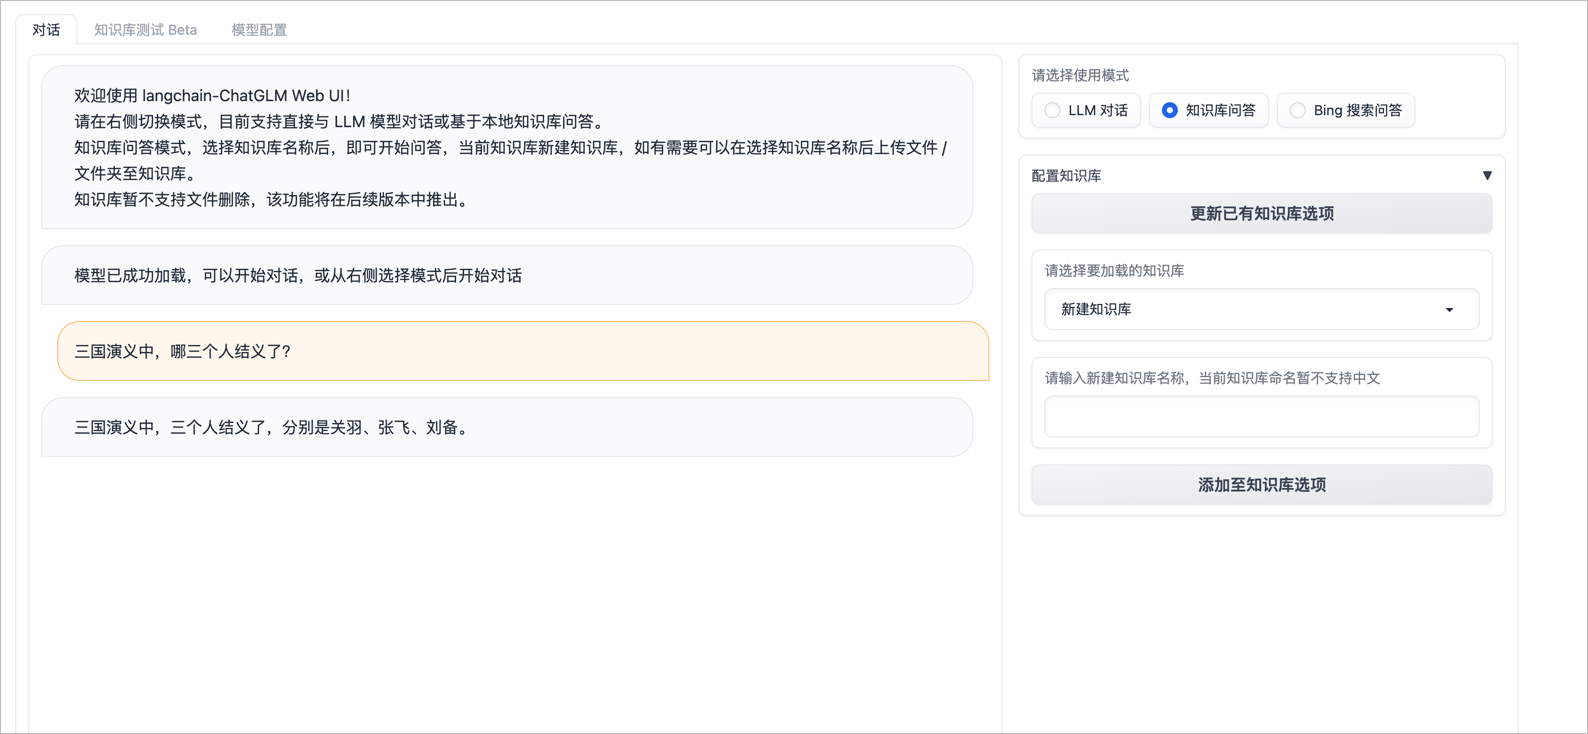

再加载我们魔改过的“三国演义-刘备改为备刘-前3回.txt”，（把文件中的刘备改为备刘，是为了验证是我们的知识库发挥作用，而不是LLM训练的结果，只使用前3回是为了让文件小一点，方便上传测试, [下载地址](https://raw.githubusercontent.com/Abirdcfly/colab/main/langchain-ChatGLM/%E4%B8%89%E5%9B%BD%E6%BC%94%E4%B9%89-%E5%88%98%E5%A4%87%E6%94%B9%E4%B8%BA%E5%A4%87%E5%88%98-%E5%89%8D3%E5%9B%9E.txt)）使用知识库模式，再问，发现AI根据我们提供的文档得到了答案：“根据已知信息，三国演义中，备刘、关羽、张飞三人结义了。”（见下图）

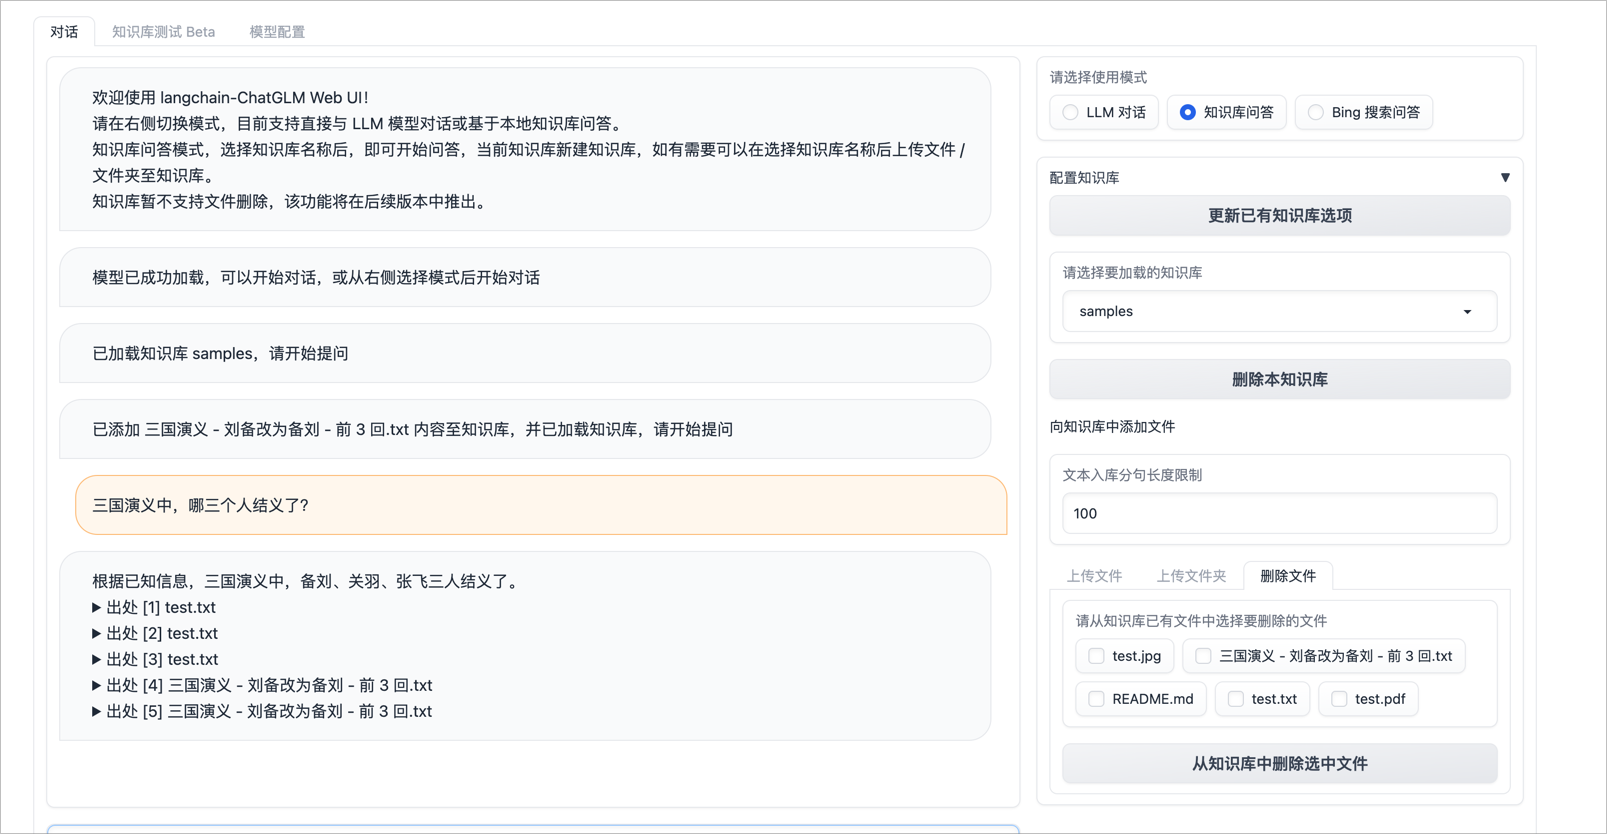